# Clean and Analyze Employee Exit Surveys

#### Objectives:

   The aim of this project is to read data from exit surveys from employees of the Department of Education, Training and Employment (DETE)}) and the Technical and Further Education (TAFE) body of the Queensland government in Australia, clean the data accordingly and try to answer the question: 
    
   *Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
    


##### Resources used:

**Anaconda distribution** - *Jupyter Notebook v 5.7.8*, *Python 3.7.3*
**Datasets** : https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey
               https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey
               
             
##### Analysis method:

The first thing is to read the surveys with Pandas:


In [2]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")


Let's explore DETE survey first

In [3]:
dete_survey.info()
dete_survey.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now le'ts take a look at TAFE survey:

In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can mark down the following conclusions for now:
    
    -> DETE survey - 56 cols, 822 rows
    -> TAFE survey - 72 cols, 702 entries
     Most of the columns won't be needed in our analysis
     
    -> In the DETE survey, "Not stated" can be replaces with NaN
    -> Some columns from both survey differ only by the way the question was formulated

We can now proceed to clean the data:


In [13]:
#taking a look at the total Null values in each column for DETE survey

dete_survey.isnull().sum()

#replace "Not Stated" with NaN

dete_survey.replace("Not Stated", np.nan)


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [14]:
#taking a look at the total Null values in each column for TAFE survey

tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

OBS: Lot's of columns we can probablyu drop ??!

They say "Not Stated" appears in Dete_survey??! I honnestly didn't see one...anyway

In [25]:
dete_survey = pd.read_csv("dete_survey.csv",na_values="Not Stated")
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

OK, we just droppped lot's of columns we don't need

Now we need to rename the columns to make sure we can merge/concatanate accordingly. I'm gonna do as they say, but i'd rather just normalize one of the table's columns and then rename the other's with a dictionary of those specific columns. But, anyway...

In [26]:
dete_survey_updated.columns= dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")
new_cols = {"Record ID": "id","CESSATION YEAR": 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}
tafe_survey_updated.rename(columns =new_cols,inplace=True)

Anaylize the separationtype column to see what we have

In [27]:
tafe_survey_updated["separationtype"].value_counts()


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [28]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [29]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()


Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

OK, these guys just took the first part from "Resignation-X" - I wanted to use regular expressions but couldn't quite do it. Maybe next time....

In [30]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Now - check the data for inconsistencies - maybe YEARS, numbers, etc?!?

In [31]:
dete_resignations["cease_date"].value_counts()
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")


In [32]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [33]:

tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

So i guess we'll just leave the years as they are.....will continue tomorrow..

In [34]:
%matplotlib inline

In [35]:
#BoxPLot - to be tried!!

dete_resignations.plot(kind="box", y="cease_date",yticks=int(dete_resignations["cease_date"]))

TypeError: cannot convert the series to <class 'int'>

In [50]:
dete_resignations["institute_service"]=dete_resignations["cease_date"]-dete_resignations["dete_start_date"]

In [51]:
dete_resignations["institute_service"].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

OK we just created a new column that is also present in tafe_resignations, with the same kind of data, so we can merge them on those fields...

Now, we need to filter by any columns and data which suggests the employees were dissatisfied...

In [52]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [53]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [54]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()


# And from down here , the fun starts! - REVIEW!

In [55]:
dete_resignations["institute"]="DETE"
tafe_resignations["institute"]="TAFE"

In [56]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)


combined.notnull().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
employment_conditions                                                        311
ill_health                  

In [57]:
#Eliminate NaN values!
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [58]:

#Extract years with vectorized string methods!

combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [60]:
# Check the years extracted are correct
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [64]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# Make some analysis now...

In [62]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

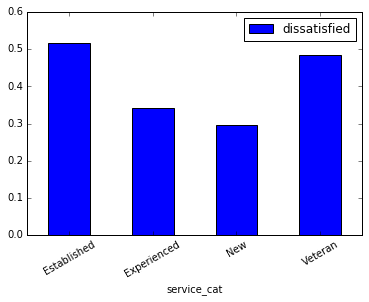

In [65]:

# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)